### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### Loading Credits dataset

In [180]:
df_credits = pd.read_csv("credits.csv")
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [181]:
df_credits.shape

(4803, 4)

In [182]:
# Check for the duplicates in the first dataset
sum(df_credits.duplicated())

0

In [183]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [184]:
# Check for unique values in each variable in the first dataset
df_credits.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

> While there are 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates

In [185]:
cp_credits = df_credits
cp_credits.shape

(4803, 4)

In [186]:
cp_credits.drop(['crew'], axis=1, inplace=True)
cp_credits.head(2)

,movie_id,title,cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."


### Loading Movies dataset 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [187]:
df_movies = pd.read_csv("movies.csv")
df_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [188]:
df_movies.shape

(4803, 20)

In [189]:
# Check for the duplicates in the second dataset
sum(df_movies.duplicated())

0

In [190]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

> release_date variable should be of the form datetime

In [191]:
df_movies['release_date'] =  pd.to_datetime(df_movies['release_date'])

In [192]:
df_movies.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [193]:
# Check for unique values in each variable in the second dataset
df_movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

- While there are 4803 movies in total, there are only 4800 unique titles and which suggest the presence of duplicates
- There are 4800 titles but 4801 original titles which suggests further investigation in the 2 variables
- There are 4802 unique popularity values instead of 4803 which suggests presence of duplicates
- Status has only 3 unique values which needs further investigation to find if we need all the observations or some of them can be removed

In [194]:
#Explore further the count of each unique value in the status variable as mentioned above
df_movies.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

> Almost all the obseravtions belongs to 'Released' status. The dataset needs to be limited to this value of status only as including other status like 'Rumored' and 'Post Production' makes no sense

### Copying the df_movies into cp_movies for manipulations

In [195]:
cp_movies = df_movies
cp_movies.shape

(4803, 20)

In [196]:
cp_movies = cp_movies.loc[(cp_movies["status"] != 'Rumored') & (cp_movies["status"] != 'Post Production')]

In [197]:
cp_movies.shape

(4795, 20)

In [198]:
cp_movies.status.value_counts() # smaples having 'rumored' and 'post production' as value in status columns are removed

Released    4795
Name: status, dtype: int64

In [199]:
# Check null count
cp_movies.isnull().sum()

budget                     0
genres                     0
homepage                3086
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  838
title                      0
vote_average               0
vote_count                 0
dtype: int64

> There are huge number of null values in homepage followed by tagline. These are the variables which we might not even require in our further analysis

### Removing not required columns

In [200]:
cp_movies = cp_movies.drop(columns=["homepage", "production_companies", "production_countries", "tagline", "spoken_languages", "original_language", "original_title", "keywords"])

In [201]:
cp_movies.shape

(4795, 12)

 ### Now df cp_movies looks much better and the null counts are so less that we can directly drop the null observations in any variable

In [202]:
cp_movies.dropna(inplace = True)

In [203]:
cp_movies.shape

(4791, 12)

### Check for duplicates in the title column

In [204]:
cp_movies[cp_movies['title'].duplicated() == True]

,budget,genres,id,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,Gang-du is a dim-witted man working at his fat...,27.655270,2006-07-27,88489643,119.0,Released,The Host,6.7,537
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,Ordinary people find extraordinary courage in ...,0.706355,2006-10-12,0,103.0,Released,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,The Dynamic Duo faces four super-villains who ...,9.815394,1966-07-30,0,105.0,Released,Batman,6.1,203


In [206]:
cp_movies[cp_movies['title'].str.contains('Batman')]

,budget,genres,id,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,Fearing the actions of a god-like Super Hero l...,155.790452,2016-03-23,873260194,151.0,Released,Batman v Superman: Dawn of Justice,5.7,7004
119,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",272,"Driven by tragedy, billionaire Bruce Wayne ded...",115.040024,2005-06-10,374218673,140.0,Released,Batman Begins,7.5,7359
210,125000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",415,Along with crime-fighting partner Robin and ne...,50.073575,1997-06-20,238207122,125.0,Released,Batman & Robin,4.2,1418
299,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",414,The Dark Knight of Gotham City confronts a das...,48.205606,1995-05-31,336529144,121.0,Released,Batman Forever,5.2,1498
428,80000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",364,"Having defeated the Joker, Batman now faces th...",59.113174,1992-06-19,280000000,126.0,Released,Batman Returns,6.6,1673
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,The Dark Knight of Gotham City begins his war ...,44.104469,1989-06-23,411348924,126.0,Released,Batman,7.0,2096
3854,3500000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 16, ""nam...",142061,Batman has stopped the reign of terror that Th...,25.891466,2013-01-18,0,78.0,Released,"Batman: The Dark Knight Returns, Part 2",7.9,419
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,The Dynamic Duo faces four super-villains who ...,9.815394,1966-07-30,0,105.0,Released,Batman,6.1,203


> Above result shows that, prior observation of duplicates in title column was wrong and there can be more than onw movies with the same title

In [207]:
mean_rev = cp_movies['revenue'].mean() #mean value of revenue
mean_rev

82466500.87893967

In [208]:
cp_movies.query('revenue == 0 or budget == 0')

,budget,genres,id,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,The Lovers is an epic romance time travel adve...,2.418535,2015-02-13,0,109.0,Released,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,"Lawrence Talbot, an American man on a visit to...",21.214571,2010-02-11,0,102.0,Released,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,Conrad and Sally Walden are home alone with th...,18.251129,2003-11-21,0,82.0,Released,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",10214,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,2005-02-18,0,94.0,Released,Son of the Mask,3.6,338
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,Two rival politicians compete to win an electi...,16.460356,2012-08-09,104907746,85.0,Released,The Campaign,5.6,578
...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",67238,"Adam, a security guard, travels from Californi...",0.022173,2005-03-12,0,80.0,Released,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,Shanghai Calling,5.7,7


In [209]:
cp_movies.query('revenue == 0 or budget == 0').count()

budget          1563
genres          1563
id              1563
overview        1563
popularity      1563
release_date    1563
revenue         1563
runtime         1563
status          1563
title           1563
vote_average    1563
vote_count      1563
dtype: int64

> Looks like there are quite many observations where budget and revenue have zero values

### Replacing the zero values in revenue and budget columns with their respective means

In [210]:
cp_movies.replace({'revenue': {0: mean_rev}}, inplace = True)

In [211]:
mean_bud = cp_movies['budget'].mean() #mean value of budget
mean_bud

29113641.728031725

In [212]:
cp_movies.replace({'budget': {0: mean_bud}}, inplace = True)
cp_movies.query('revenue == 0 or budget == 0').count()

budget          0
genres          0
id              0
overview        0
popularity      0
release_date    0
revenue         0
runtime         0
status          0
title           0
vote_average    0
vote_count      0
dtype: int64

### Replacing zero values in runtime column with its mean 

In [213]:
mean_rt = cp_movies['runtime'].mean()
mean_rt

106.94239198497182

In [214]:
cp_movies.replace({'runtime': {0: mean_rt}}, inplace = True)

In [215]:
cp_movies.query('revenue == 0 or budget == 0 or runtime == 0').count() # now no column has zero as value

budget          0
genres          0
id              0
overview        0
popularity      0
release_date    0
revenue         0
runtime         0
status          0
title           0
vote_average    0
vote_count      0
dtype: int64

In [216]:
cp_movies.head()

,budget,genres,id,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.787965e+09,162.0,Released,Avatar,7.2,11800
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,9.610000e+08,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,8.806746e+08,148.0,Released,Spectre,6.3,4466
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,Following the death of District Attorney Harve...,112.312950,2012-07-16,1.084939e+09,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,2.841391e+08,132.0,Released,John Carter,6.1,2124


### Profit values by using revenue and budget values as
> revenue - budget = profit

In [217]:
cp_movies['profit'] = cp_movies['revenue'] - cp_movies['budget']
cp_movies.profit.head()

0    2.550965e+09
1    6.610000e+08
2    6.356746e+08
3    8.349391e+08
4    2.413910e+07
Name: profit, dtype: float64

In [219]:
#cp_credits.columns = ['cast']
#cp_movies= cp_movies.merge(credits, on='id')

In [220]:
#movies.shape # now movies has 23 columns

In [221]:
# Check for the duplicates in the first dataset
#sum(credits.duplicated())

In [222]:
cp_movies.rename(columns = {'title':'Title'}, inplace = True)

### Popular Movies

In [226]:
pop = cp_movies.sort_values('popularity', ascending=False).reset_index()[:18]

fig = px.bar(pop, pop['popularity'], pop['Title'], title= 'Popular Movies', color='vote_average')
fig

### Profit vs. Budget

In [241]:
#bud = cp_movies.sort_values('budget', ascending=False).reset_index()[:15]

fig2 = px.scatter(cp_movies, cp_movies['budget'], cp_movies['profit'], title= 'Profit vs Budget', color='vote_average', size='revenue',  hover_data=['Title'])
fig2

### Profit vs. runtime

In [242]:
fig3 = px.scatter(cp_movies, cp_movies['runtime'], cp_movies['profit'], title= 'Profit vs Runtime', color='vote_average', size='runtime',  hover_data=['Title'])
fig3

### Profit vs. Revenue

In [240]:
fig4 = px.scatter(cp_movies, cp_movies['revenue'], cp_movies['profit'], title= 'Profit vs Revenue', color='vote_average', size='revenue',  hover_data=['Title'])
fig4

In [248]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='silver', 
                colormap='hot', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

In [249]:
original_title = ' '.join(cp_movies[~cp_movies.Title.isnull()].Title.unique())

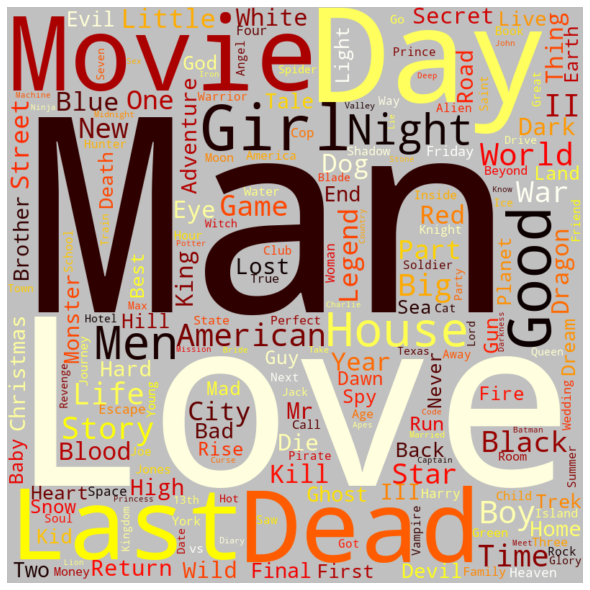

In [250]:
wordcloud = make_wordcloud(original_title)

In [19]:
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.8) #movies having vote count greater than 90% from the list will be taken
lists_movies = movies.copy().loc[movies['vote_count'] >= m]
lists_movies.shape

(961, 22)

In [20]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula (m=1838, c=6.09)
    return (v/(v+m) * R) + (m/(m+v) * C)

In [21]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
lists_movies['score'] = lists_movies.apply(weighted_rating, axis=1)

In [22]:
lists_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,Title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.116845
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.758257
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.263305


In [23]:
lists_movies.shape

(961, 23)

In [24]:
#Sort movies based on score calculated above
lists_movies = lists_movies.sort_values('score', ascending=False)

#Print the top 10 movies
lists_movies[['Title', 'vote_count', 'vote_average', 'score']].head(10)

,Title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.248353
662,Fight Club,9413,8.3,8.096134
3337,The Godfather,5893,8.4,8.077404
3232,Pulp Fiction,8428,8.3,8.074738
65,The Dark Knight,12002,8.2,8.044250
809,Forrest Gump,7927,8.2,7.972814
96,Inception,13752,8.1,7.969290
95,Interstellar,10867,8.1,7.937399
1990,The Empire Strikes Back,5879,8.2,7.904757
1818,Schindler's List,4329,8.3,7.900080


In [25]:
movies['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

In [26]:
#based on the description we shall find the similarity among the movies.

from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
movies['overview'] = movies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [27]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['Title']).drop_duplicates()

In [29]:
# Function that takes in movie title as input and outputs most similar movies

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['Title'].iloc[movie_indices]

In [30]:
get_recommendations('The Matrix')

1281                  Hackers
2996                 Commando
2088                    Pulse
1341     The Inhabited Island
333             Transcendence
0                      Avatar
261     Live Free or Die Hard
775                 Supernova
125       The Matrix Reloaded
2614          The Love Letter
Name: Title, dtype: object

In [31]:
get_recommendations('The Shawshank Redemption')

4531               Civil Brand
3785                    Prison
609                Escape Plan
2868                  Fortress
4727              Penitentiary
1779    The 40 Year Old Virgin
2667          Fatal Attraction
3871         A Christmas Story
434           The Longest Yard
42                 Toy Story 3
Name: Title, dtype: object

In [32]:
get_recommendations('Kabhi Alvida Naa Kehna')

1714            Serendipity
1869              The Hours
4081    The Lives of Others
3638            Rabbit Hole
1576             Bride Wars
4663     Along the Roadside
4399                Special
4799              Newlyweds
1592             Black Rain
1720               Kick-Ass
Name: Title, dtype: object

In [33]:
get_recommendations('Fight Club')

3619                      UHF
2828                Project X
2585          The Hurt Locker
2344              Raging Bull
2023               The Animal
1414      Blast from the Past
4044               Go for It!
3515             Freaky Deaky
4045    Dancer, Texas Pop. 81
4760    This Is Martin Bonner
Name: Title, dtype: object

In [34]:
get_recommendations('X-Men')

134     Mission: Impossible - Rogue Nation
342                           Men in Black
1089                           The Phantom
101                     X-Men: First Class
203                                     X2
1894                                   War
590                              The Siege
33                   X-Men: The Last Stand
122               X-Men Origins: Wolverine
1626                My Super Ex-Girlfriend
Name: Title, dtype: object

In [35]:
get_recommendations('The Wolf of Wall Street')

588     Wall Street: Money Never Sleeps
2110         Madea's Witness Protection
2448                        Wall Street
3837                      She's the One
2610                     A Mighty Heart
3257                    American Psycho
2686               An American Haunting
1644                    Pride and Glory
2783                           The Call
4120            Saint John of Las Vegas
Name: Title, dtype: object

In [36]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [37]:
#Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [38]:
#Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
  #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [39]:
#Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [40]:
# Print the new features of the first 5 films
movies[['Title', 'cast', 'director', 'keywords', 'genres']].head(9)

,Title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco]",Sam Raimi,"[dual identity, amnesia, sandstorm]","[Fantasy, Action, Adventure]"
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy]",Byron Howard,"[hostage, magic, horse]","[Animation, Family]"
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,"[marvel comic, sequel, superhero]","[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",David Yates,"[witch, magic, broom]","[Adventure, Fantasy, Family]"


In [41]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,Title,vote_average,vote_count,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton


In [42]:
direc = movies.head(30)

fig3 = px.bar(direc, direc['revenue'], direc['director'], title= 'Which directors make the most profit', color = direc['budget'], hover_data = ['Title'])
fig3